# KNN

## Zoo

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [6]:
data=pd.read_csv("Zoo.csv")
df=pd.DataFrame(data)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [49]:
x=df.iloc[:,1:17]
y=df["type"]

In [50]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [51]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [52]:
scaler=StandardScaler()
scaler_x=scaler.fit_transform(x)

In [53]:
y.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

# Model Fitting

In [55]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred=knn_model.predict(x_test)
print("Accuracy=",(accuracy_score(y_test,y_pred)))

Accuracy= 0.9523809523809523


In [57]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y_pred=knn_model.predict(x_test)
print("Accuracy=",(accuracy_score(y_test,y_pred)))

Accuracy= 1.0


In [59]:
neighbors=list(range(1,50,2))
cv_scores=[]

for i in neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(estimator=knn_model,X=x,y=y,cv=10)
    cv_scores.append(cv_score.mean())

In [60]:
cv_scores

[0.9800000000000001,
 0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

In [61]:
neighbors[cv_scores.index(max(cv_scores))]

1

<function matplotlib.pyplot.show(close=None, block=None)>

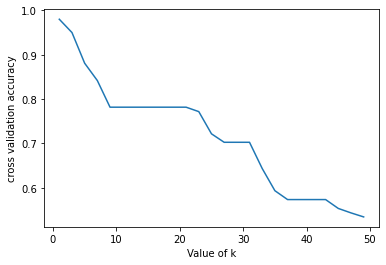

In [62]:
plt.plot(neighbors,cv_scores)
plt.xlabel("Value of k")
plt.ylabel("cross validation accuracy")
plt.show